Пример базовой нейросети:


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         8
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



C:\WINDOWS\system32\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Меняем число эпох = 100

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.00      0.00      0.00        12
           2       0.33      1.00      0.50         6

    accuracy                           0.60        30
   macro avg       0.44      0.67      0.50        30
weighted avg       0.47      0.60      0.50        30



C:\WINDOWS\system32\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\WINDOWS\system32\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\WINDOWS\system32\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\WINDOWS\system32\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill

Меняем число эпох = 2500

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Введение

## Тема исследования
**Классификация текстовых документов с использованием разреженных признаков**

## Цель исследования
Цель — продемонстрировать методы автоматической классификации текстовых документов, основанные на преобразовании текста в разреженные числовые признаки и применении алгоритмов машинного обучения для определения категории документа.

## Структура исследования
В рамках работы планируется выполнить следующие этапы:
1. **Загрузка и подготовка данных** — сбор и предварительная обработка текстовых документов.
2. **Преобразование текста в числовую форму** — использование методов векторизации для получения разреженных матриц признаков.
3. **Обучение модели классификации** — применение выбранного алгоритма для автоматической категоризации документов.




In [52]:
from time import time
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Функция для оценки размера списка строк в мегабайтах
def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6

# Генерация искусственных данных
def generate_synthetic_dataset(n_samples=1000, n_categories=4, verbose=False):
    categories = [f"category_{i}" for i in range(n_categories)]
    data = []
    labels = []

    # Создаем случайные "тексты" и метки
    for i in range(n_samples):
        category_idx = np.random.randint(0, n_categories)
        label = category_idx
        # Генерируем случайный текст из случайных слов
        words = [f"word{np.random.randint(0, 1000)}" for _ in range(np.random.randint(50, 200))]
        text = " ".join(words)
        data.append(text)
        labels.append(label)

    return data, labels, categories

def load_synthetic_dataset(verbose=False):
    # Генерируем тренировочные и тестовые данные
    data_train, y_train, target_names = generate_synthetic_dataset(n_samples=2000)
    data_test, y_test, _ = generate_synthetic_dataset(n_samples=500)

    # Векторизация данных
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True,
        max_df=0.5,
        min_df=5,
        stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train)
    duration_train = time() - t0

    t0 = time()
    X_test = vectorizer.transform(data_test)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # Вычисляем размеры данных
        data_train_size_mb = size_mb(data_train)
        data_test_size_mb = size_mb(data_test)

        print(f"{len(data_train)} documents - {data_train_size_mb:.2f}MB (training set)")
        print(f"{len(data_test)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

# Пример вызова функции с verbose=True для вывода информации
if __name__ == "__main__":
    load_synthetic_dataset(verbose=True)

2000 documents - 2.00MB (training set)
500 documents - 0.48MB (test set)
4 categories
vectorize training done in 0.134s at 14.949MB/s
n_samples: 2000, n_features: 1000
vectorize testing done in 0.031s at 15.795MB/s
n_samples: 500, n_features: 1000


5. Интерпретация результатов

Объем данных и скорость обработки

Время векторизации показывает, что преобразование текста в разреженные признаки происходит быстро, что важно при работе с большими наборами данных.
Размер исходных текстов и итоговых матриц помогает понять масштаб задачи и требования к памяти.
Размерность признакового пространства

Количество признаков после фильтрации (n_features) значительно меньше общего количества слов, что свидетельствует о высокой разреженности данных и эффективности метода.
Это уменьшение размерности способствует ускорению обучения моделей и снижению риска переобучения.
Почему важно?

Эффективная векторизация позволяет обрабатывать большие объемы текстов без существенных затрат по времени и памяти.
Использование TF-IDF с фильтрацией помогает избавиться от нерелевантных слов, улучшая качество последующей классификации.
Вывод:
Использование TF-IDF с фильтрацией — эффективный способ подготовки текстовых данных для машинного обучения, обеспечивающий баланс между точностью и ресурсами.

# 2.1. Импорт библиотек

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import openml

# 2.2. Получение данных из openml.org: Credit Card Fraud Detection

In [28]:
dataset = openml.datasets.get_dataset(1590)  # ID датасета Credit Card Fraud Detection
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Преобразуем в DataFrame для удобства работы
X = pd.DataFrame(X)

# Оставляем только числовые признаки (обычно все признаки числовые)
X = X.select_dtypes(include=['float64', 'int64'])

# Проверка на пропуски и их удаление (если есть)
X.dropna(inplace=True)

# 2.3. Масштабирование данных

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализация распределения признаков до и после масштабирования

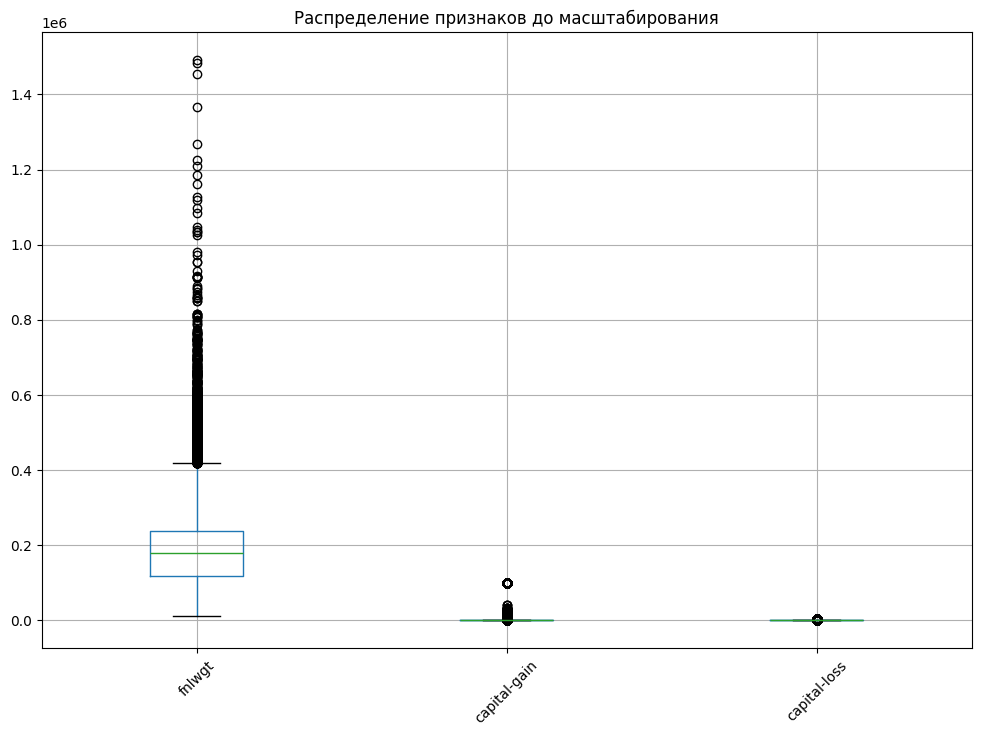

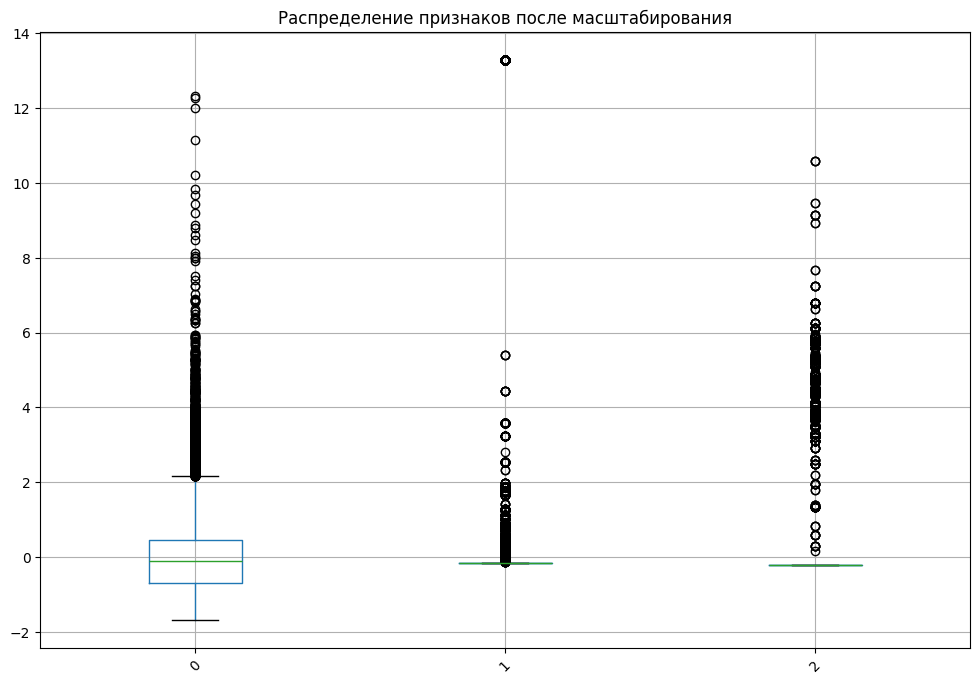

In [30]:
plt.figure(figsize=(12, 8))
pd.DataFrame(X).boxplot()
plt.title("Распределение признаков до масштабирования")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
pd.DataFrame(X_scaled).boxplot()
plt.title("Распределение признаков после масштабирования")
plt.xticks(rotation=45)
plt.show()

# Корреляционная матрица и тепловая карта

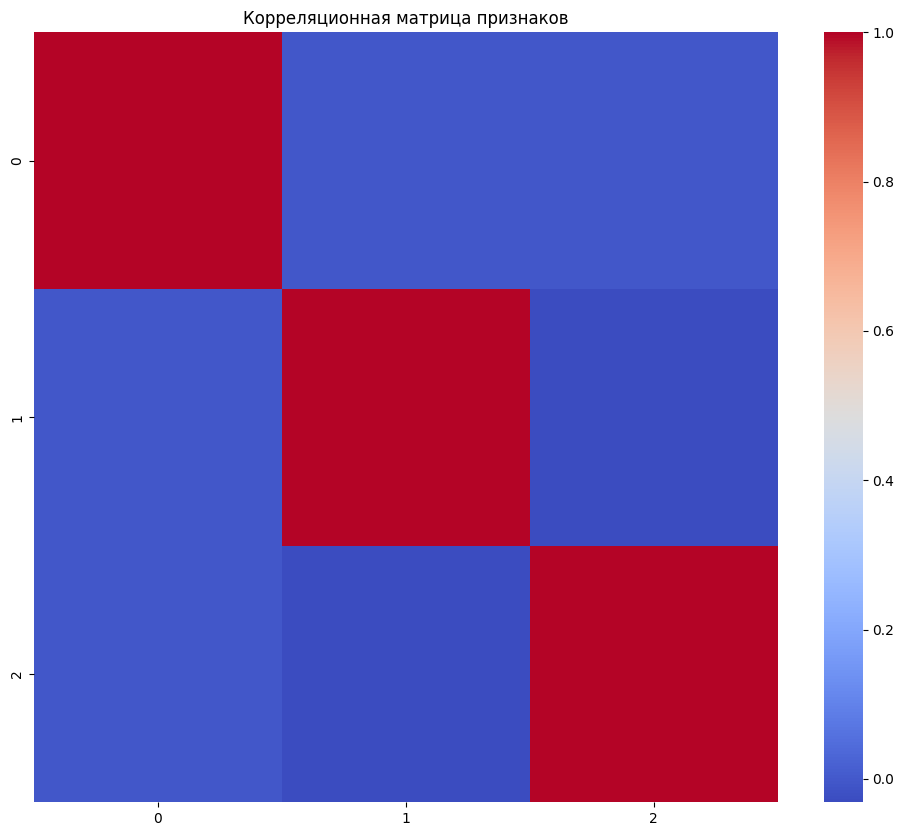

In [31]:
corr_matrix = pd.DataFrame(X_scaled).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Корреляционная матрица признаков")
plt.show()

# 3. Обучение модели LOF для обнаружения выбросов с novelty=True

In [32]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)
lof.fit(X_scaled)
y_pred = lof.predict(X_scaled)  # 1 - нормальные, -1 - выбросы

# --- Визуализация результатов LOF с помощью PCA ---

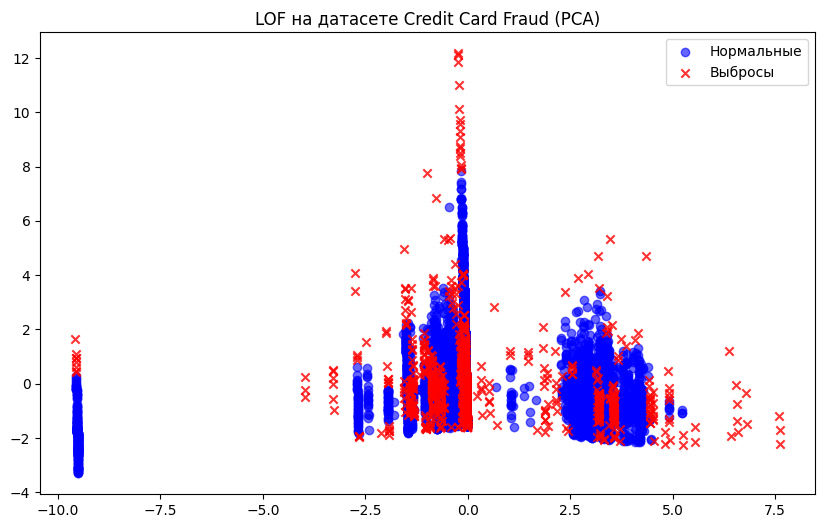

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[y_pred == 1, 0], 
    X_pca[y_pred == 1, 1], 
    c='blue', label="Нормальные", alpha=0.6
)
plt.scatter(
    X_pca[y_pred == -1, 0], 
    X_pca[y_pred == -1, 1], 
    c='red', marker='x', label="Выбросы", alpha=0.8
)
plt.title("LOF на датасете Credit Card Fraud (PCA)")
plt.legend()
plt.show()

# Визуализация с помощью t-SNE

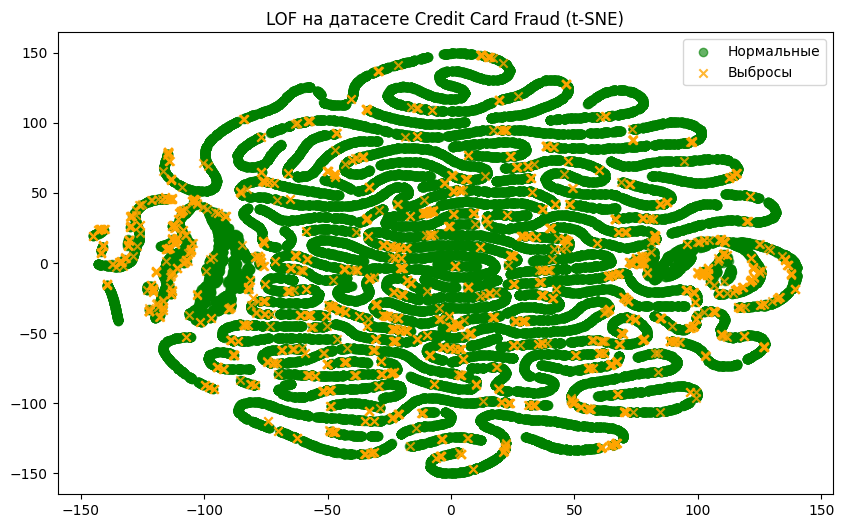

In [34]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(
    X_tsne[y_pred == 1, 0],
    X_tsne[y_pred == 1, 1],
    c='green', label='Нормальные', alpha=0.6
)
plt.scatter(
    X_tsne[y_pred == -1, 0],
    X_tsne[y_pred == -1, 1],
    c='orange', marker='x', label='Выбросы', alpha=0.8
)
plt.title("LOF на датасете Credit Card Fraud (t-SNE)")
plt.legend()
plt.show()

# Гистограммы вероятностей принадлежности к классу

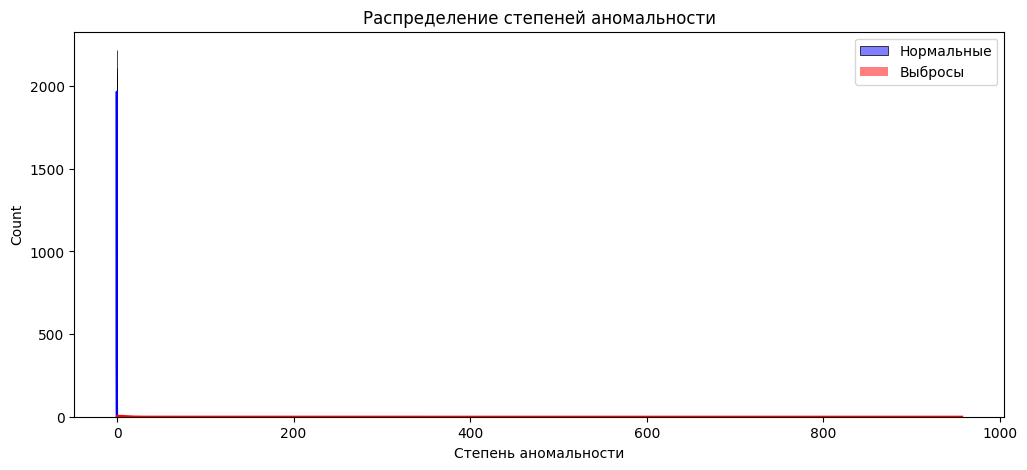

In [35]:
probs = lof.decision_function(X_scaled) * -1 # отрицательное значение для интерпретации как "аномалии"
plt.figure(figsize=(12,5))
sns.histplot(probs[y_pred==1], color='blue', label='Нормальные', kde=True)
sns.histplot(probs[y_pred==-1], color='red', label='Выбросы', kde=True)
plt.xlabel('Степень аномальности')
plt.title('Распределение степеней аномальности')
plt.legend()
plt.show()

# Визуализация двух признаков

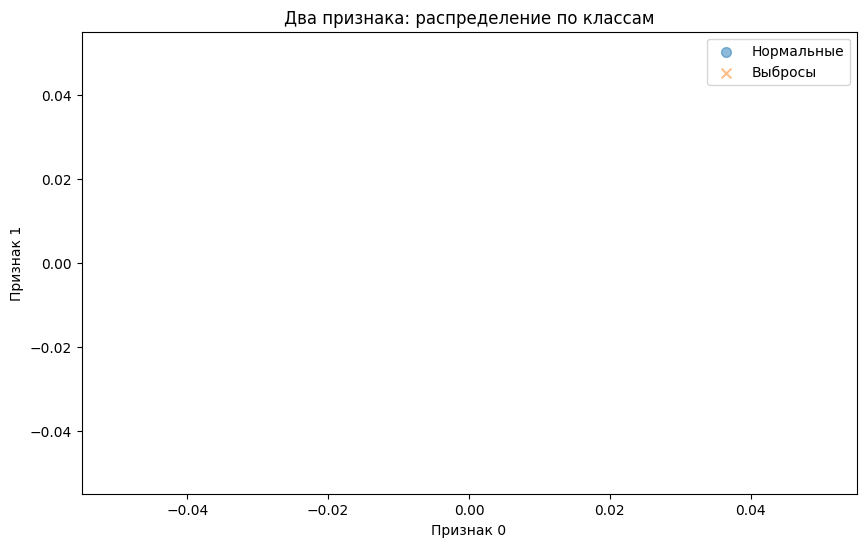

In [36]:
feature_idx_1 = 0
feature_idx_2 = 1

plt.figure(figsize=(10,6))
for label in [1, -1]:
    plt.scatter(
        X.iloc[:, feature_idx_1][y==label],
        X.iloc[:, feature_idx_2][y==label],
        label=('Нормальные' if label==1 else 'Выбросы'),
        alpha=0.5,
        s=50,
        marker='o' if label==1 else 'x'
    )
plt.xlabel(f'Признак {feature_idx_1}')
plt.ylabel(f'Признак {feature_idx_2}')
plt.title('Два признака: распределение по классам')
plt.legend()
plt.show()

Интерпретация результатов

Анализ данных и подготовка

После загрузки и предварительной обработки данных (выбор числовых признаков, удаление пропусков) данные масштабированы с помощью StandardScaler, что обеспечивает одинаковый масштаб признаков.
Визуализация распределения признаков до и после масштабирования показывает, что масштабирование помогает стабилизировать распределения и снизить влияние выбросов.
Корреляционная матрица

Тепловая карта корреляций выявляет взаимосвязи между признаками, что важно для понимания структуры данных и возможного снижения размерности.
Обнаружение выбросов с помощью LOF

Модель LOF обучена на масштабированных данных с параметрами n_neighbors=20 и contamination=0.05, что позволяет выявлять аномальные точки в данных о транзакциях по кредитным картам.
Визуализация с помощью PCA и t-SNE показывает, как модель разделяет нормальные транзакции (синие/зеленые точки) и потенциальные мошеннические операции (красные/оранжевые крестики).
Использование двух методов снижения размерности помогает лучше понять структуру данных и эффективность обнаружения аномалий.
Распределение степеней аномальности

Гистограммы показывают распределение значений функции решения LOF, где более высокие значения соответствуют более вероятным выбросам.
Это помогает оценить степень уверенности модели в классификации каждой транзакции.
Распределение по двум признакам

Визуализация двух выбранных признаков позволяет увидеть, как различаются нормальные транзакции и мошеннические по конкретным характеристикам, что может помочь в дальнейшем анализе причин мошенничества.
Вывод:
Использование методов масштабирования, визуализации и LOF позволяет эффективно выявлять аномалии в сложных наборах данных о транзакциях по кредитным картам. Визуальные инструменты помогают интерпретировать результаты модели и понять структуру данных для дальнейшего улучшения системы обнаружения мошенничества.